In [ ]:
from scipy.integrate import quad, dblquad, tplquad
from sympy import integrate as integrate
from sympy.physics.wigner import wigner_3j as wigner
import scipy.special as sc
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cmath
import mpmath as mp
import sympy as sy
import scipy.interpolate as interpolate
from scipy.special import gamma, factorial, spherical_jn
from math import sqrt, factorial
from ipykernel import kernelapp as app

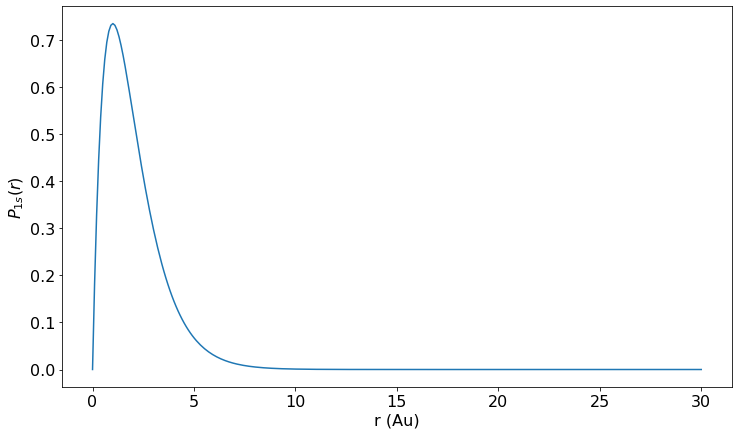

1.0000000000000002 3.0000000000000004


In [ ]:
##Ground state of hydrogren
def bound_1s(r):
    return 2*z**(3/2)*r*math.exp(-z*r)  #Z = atomic number, r = distance between nucleus and electron
bound_vector_1s = np.vectorize(bound_1s)
r_values = np.linspace(0,30,300)

z = 1

plt.rcParams['font.size'] = '16'
plt.figure(figsize=(12,7))
plt.plot(r_values, bound_vector_1s(r_values))
plt.xlabel("r (Au)")
plt.ylabel('$P_{1s}(r)$')
plt.show()

def bound_1s_squared(r):
    return (bound_1s(r))**2

orth_check = quad(bound_1s_squared, 0, np.inf)  #check orthogonality

def expectation_r_squared_2s(r):
    return bound_1s_squared(r)*r**2

expectation_value = quad(expectation_r_squared_2s, 0, np.inf)  #check expectation value of r^2
print(orth_check[0], expectation_value[0])

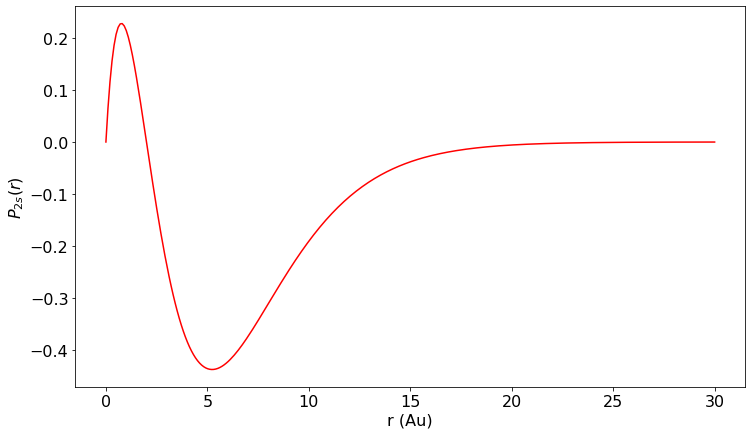

0.9999999999999997 42.0


In [ ]:
#2s state of hydrogen
def bound_2s(r):
    return (1/(2**(1/2)))*z**(3/2)*r*math.exp(-z*r/2)*(1 - (z*r/2))

bound_vector_2s = np.vectorize(bound_2s)
r_values = np.linspace(0,30,300)

z = 1

plt.rcParams['font.size'] = '16'
plt.figure(figsize=(12,7))
plt.plot(r_values, bound_vector_2s(r_values), color='red')
plt.xlabel("r (Au)")
plt.ylabel('$P_{2s}(r)$')
plt.show()

def bound_2s_squared(r):
    return (bound_2s(r))**2

orth_check = quad(bound_2s_squared, 0, np.inf)  #Check orthogonality

def expectation_r_squared_2s(r):
    return bound_2s_squared(r)*r**2

expectation_value = quad(expectation_r_squared_2s, 0, np.inf) #check expectation value of r^2

print(orth_check[0], expectation_value[0])

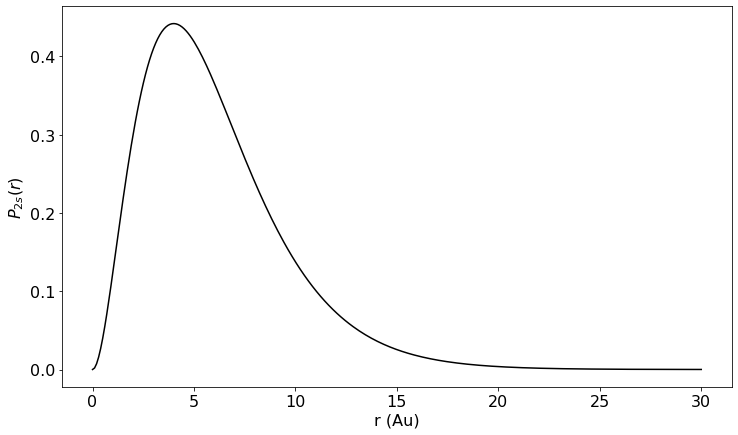

1.0000000000000004 30.000000000000014


In [ ]:
def bound_2p(r):
    return (1/(2*math.sqrt(6)))*z**(5/2)*r**2*math.exp(-z*r/2)

bound_vector_2p = np.vectorize(bound_2p)
r_values = np.linspace(0,30,300)

z = 1

plt.rcParams['font.size'] = '16'
plt.figure(figsize=(12,7))
plt.plot(r_values, bound_vector_2p(r_values), color='black')
plt.xlabel("r (Au)")
plt.ylabel('$P_{2s}(r)$')
plt.show()

def bound_2p_squared(r):
    return (bound_2p(r))**2

orth_check = quad(bound_2p_squared, 0, np.inf)

def expectation_r_squared_2p(r):
    return bound_2p_squared(r)*r**2

expectation_value = quad(expectation_r_squared_2p, 0, np.inf)

print(orth_check[0], expectation_value[0])

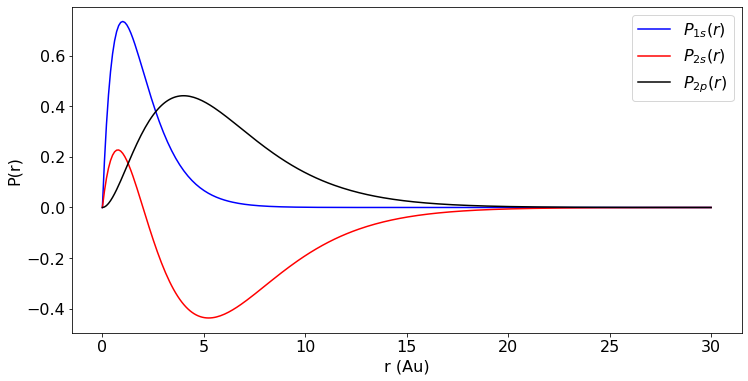

In [ ]:
r_values = np.linspace(0,30,300)

plt.rcParams['font.size'] = '16'
figure(figsize=(12,6))
plt.plot(r_values, bound_vector_1s(r_values), color='blue', label='$P_{1s}(r)$')
plt.plot(r_values, bound_vector_2s(r_values), color='red', label='$P_{2s}(r)$')
plt.plot(r_values, bound_vector_2p(r_values), color='black', label='$P_{2p}(r)$')
plt.xlabel("r (Au)")
plt.ylabel("P(r)")
plt.legend()
plt.show()

In [ ]:
#r = np.linspace(0,30,300)
#plt.rcParams['font.size'] = '32'
#figure, axis = plt.subplots(2, 2)


#axis[0, 0].plot(r, A1(r))
#axis[0, 0].figure.set_size_inches(20, 10)
#axis[0, 0].set_xlabel('r (au)')
#axis[0, 0].set_ylabel('$P_{1s}(r)$')


#axis[0, 1].plot(r, B1(r))
#axis[0, 1].figure.set_size_inches(20, 10)
#axis[0, 1].set_xlabel('r (au)')
#axis[0, 1].set_ylabel('$P_{2s}(r)$')


#axis[1, 0].plot(r, C1(r))
#axis[1, 0].figure.set_size_inches(20, 10)
#axis[1, 0].set_xlabel('r (au)')
#axis[1, 0].set_ylabel('$P_{2p}(r)$')


#axis[1, 1].plot(r, A1(r), color='blue', label='$P_{1s}(r)$')
#axis[1, 1].plot(r, B1(r), color='red', label='$P_{2s}(r)$')
#axis[1, 1].plot(r, C1(r), color='black', label='$P_{2p}(r)$')
#axis[1, 1].figure.set_size_inches(30, 20)
#axis[1, 1].set_xlabel('r (au)')
#axis[1, 1].set_ylabel('$P_{n\ell}(r)$')

# Combine all the operations and display
#fig.tight_layout()
#plt.figure(dpi=1000)
#axis[1, 1].legend()
#plt.show()

In [ ]:
def P(r):
    return (2*Z*r/n)**(l+1)*math.exp(-Z*r/n)*mp.hyp1f1(l - n + 1,2*l + 2,2*Z*r/n)

n = 2
l = 0
Z = 1
def P2(r):
    return (P(r))**2
x = quad(P2, 0, np.inf)

N = (1/x[0])**(1/2)

def P3(r):
    return (N*P(r))**2
z = quad(P3, 0, np.inf)

def P4(r):
    return P3(r)*r**2
y = quad(P4, 0, np.inf)
print(z[0], y[0])

1.0000000000000002 42.00000000000002


13.307377710829


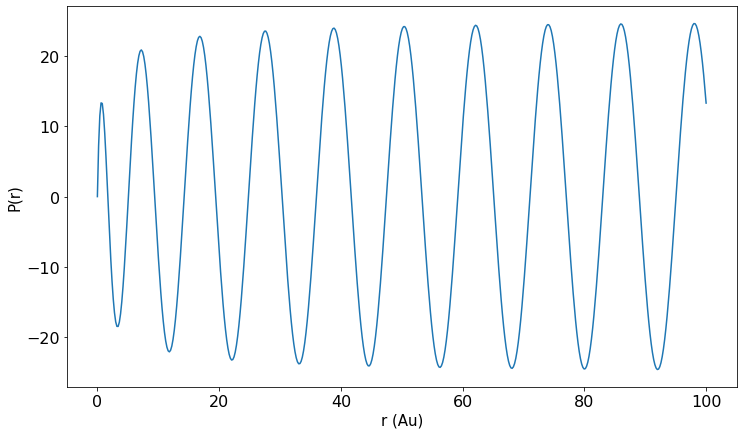

In [ ]:
def Coul(r,k,l,Z):
    return np.real((((4*math.pi)/(2*k)*abs(gamma(l + 1 - (Z*(1j)/k)))*cmath.exp(math.pi*Z/(2*k)))/(math.factorial(2*l + 1)))*((2*k*r)**(l+1))*cmath.exp((-1j)*k*r)*mp.hyp1f1(l + 1 + ((1j)*Z/k),2*l + 2,2*(1j)*k*r))

def CoulRe(r):
    return Coul.real
x=np.linspace(0,100,500)
y=[]
z=[]
for r in np.linspace(0,100,500):
    y.append(Coul(r,0.5,0,1).real)
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.xlabel("r (Au)", fontsize=15)
plt.ylabel("P(r)", fontsize=15)
plt.show

print(Coul(r,0.5,0,1))

In [ ]:
def CoulConj(r):
    Nkl = 4.*pi/(2.*k) * abs( sc.gamma(l+1-1j/k) ) * np.exp( pi/(2.*k) ) / factorial(2*l+1)
    f_rparts = (2*k*r)**(l+1) * np.exp(-1j*k*r) * mp.hyp1f1(l+1+1j/k, 2*l+2, 2j*k*r, accurate_small=False)
    Pkl = Nkl*f_rparts
    if abs(Pkl.imag)>10**-6:
        print("Error - Pkl should be real but there is an imaginary part!!")
    return Pkl.real
Pnlkl = lambda x: Pnl(x, 4, 0)*Pkl(x,4,0)
n = 1
k=0.5
l=0
Z=1
x=quad(Pnlkl,0,100)
print(x)

NameError: ignored

norm check: 0.9999999999999999 1.633188258351606e-09
orth check: 1.0243891713727221e-06 1.3420102705470491e-08
norm coulomb check: 2357.9779791919345 2.2018612750761188e-07 2422.365365648423
2357.9779791919345


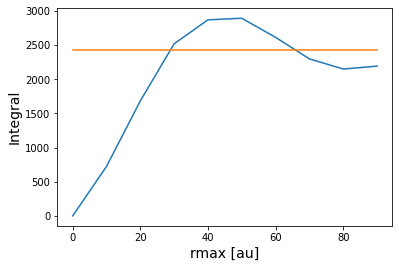

In [ ]:
pi=np.pi
def Pnl(r, n, l):
    if isinstance(n, int) and isinstance(l, int) == True:
        Nnl = 1./(n*factorial(2*l+1)) * sqrt( factorial(n+l)/factorial(n-l-1) )
        f_rparts = (2*r/n)**(l+1) * np.exp(-r/n) * mp.hyp1f1(-n+l+1, 2*l+2, 2*r/n, accurate_small=False)
        return Nnl*f_rparts
    else:
        print("you did not enter an integer", n, l)
        return 0


##def Pnl(r, n, l):
##    Nnl = 1./(n*factorial(2*l+1)) * sqrt( factorial(n+l)/factorial(n-l-1) )
##    f_rparts = (2*r/n)**(l+1) * np.exp(-r/n) * mp.hyp1f1(-n+l+1, 2*l+2, 2*r/n, accurate_small=False)
##    return Nnl*f_rparts

# rarray1 = []
# rarray2 = []
# for rstep1 in range(0,500):
#     rstep=rstep1/20
#     P1=Pnl(rstep,2,0)
#     rarray1.append(rstep)
#     rarray2.append(P1)
#     #print(rstep,P1)
# plt.plot(rarray1, rarray2)
# plt.xlabel("r [au]", fontsize=14)
# plt.ylabel("Pnl", fontsize=14)
# plt.show()

Pnlsq = lambda x: Pnl(x, 4, 1)**2
res, err = quad(Pnlsq, 0, np.inf)
print("norm check:", res,err)

def Pkl(r, k, l):
    Nkl = 4.*pi/(2.*k) * abs( sc.gamma(l+1-1j/k) ) * np.exp( pi/(2.*k) ) / factorial(2*l+1)
    f_rparts = (2*k*r)**(l+1) * np.exp(-1j*k*r) * mp.hyp1f1(l+1+1j/k, 2*l+2, 2j*k*r, accurate_small=False)
    Pkl = Nkl*f_rparts
    if abs(Pkl.imag)>10**-6:
        print("Error - Pkl should be real but there is an imaginary part!!")
    return Pkl.real

Pnlkl = lambda x: Pnl(x, 4, 0)*Pkl(x,4,0)
res, err = quad(Pnlkl, 0, 100.)
print("orth check:", res,err)

# rarray1 = []
# rarray2 = []
# for rstep1 in range(0,500):
#     rstep=rstep1/20
#     P1=Pkl(rstep,2,0)
#     rarray1.append(rstep)
#     rarray2.append(P1)
#     #print(rstep,P1)
# plt.plot(rarray1, rarray2)
# plt.xlabel("r [au]", fontsize=14)
# plt.ylabel("Pkl", fontsize=14)
# #plt.show()

kprime = 0.32
Pklkl = lambda k, x: Pkl(x, k, 1)*Pkl(x,kprime,1)
res, err = dblquad(Pklkl, 0, 100, lambda x: kprime-0.1, lambda x: kprime+0.1)
trueans = (2.*pi)**3./kprime**2
print("norm coulomb check:", res,err,trueans)

# We can swap the order of integration and see if we get the same result:
#
# kprime = 0.32
# Pklkl = lambda x, k: Pkl(x, k, 1)*Pkl(x,kprime,1)
# res, err = dblquad(Pklkl, kprime-0.1, kprime+0.1, lambda k: 0., lambda k: 100)
# trueans = (2.*pi)**3./kprime**2
# print("norm coulomb check:", res,err,trueans)

#It seems the integral converges slowly
#one way to deal with this is to plot the result as the upper limit increases
#that is the point of the code below
def concheck(xmax):
    res, err = dblquad(Pklkl, 0, xmax, lambda x: kprime-0.1, lambda x: kprime+0.1)
    return res

print(concheck(100))

rarray1 = []
rarray2 = []
#chosing 10 (rmax=100) for the max range is reasonably quick. Increasing to 25 is very slow!
for rstep1 in range(0,10):
    rstep=rstep1*10
    P1=concheck(rstep)
    rarray1.append(rstep)
    rarray2.append(P1)
    #print(rstep,P1)
plt.plot(rarray1, rarray2)
plt.xlabel("rmax [au]", fontsize=14)
plt.ylabel("Integral", fontsize=14)

rarray1 = []
rarray2 = []
for rstep1 in range(0,10):
    rstep=rstep1*10
    rarray1.append(rstep)
    rarray2.append(trueans)
    #print(rstep,P1)
plt.plot(rarray1, rarray2)

plt.show()

<function matplotlib.pyplot.show>

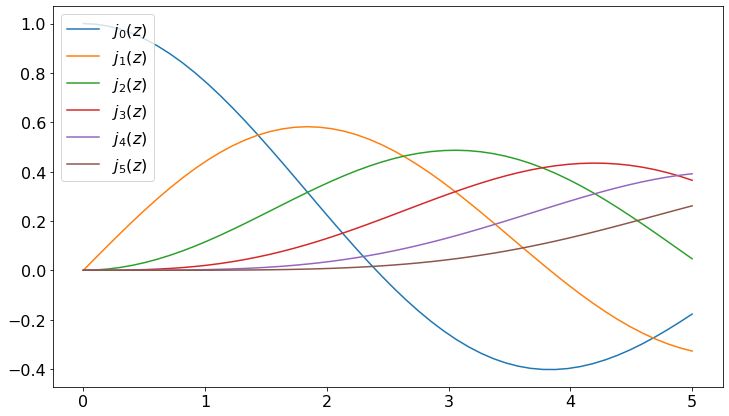

In [ ]:
x=np.linspace(0,5,50)
y0=sc.jv(0, x)
y1=sc.jv(1, x)
y2=sc.jv(2, x)
y3=sc.jv(3, x)
y4=sc.jv(4, x)
y5=sc.jv(5, x)

plt.rcParams['font.size'] = '16'
plt.figure(figsize=(12,7))
plt.plot(x,y0, label='$j_0(z)$')
plt.plot(x,y1, label='$j_1(z)$')
plt.plot(x,y2, label='$j_2(z)$')
plt.plot(x,y3, label='$j_3(z)$')
plt.plot(x,y4, label='$j_4(z)$')
plt.plot(x,y5, label='$j_5(z)$')
plt.legend()
plt.show

In [ ]:
x = (wigner(0,4,4,0,0,0)**2)/2
print(x)

1/18


In [ ]:
##PKlnlJL = lambda x: Pkl(x, K, i)*Pnl(x,n,l)*sc.jv(j,(x*0.15))

##res, err = quad(PKlnlJL,0,200)
##print(res, err)

In [ ]:
min=0.1
max=3
interval=30

In [ ]:
Q=1
n=1
l=0
dP = []
prob1 = []
for K in np.linspace(min,max,interval):
  sum = 0
  for i in (0,1,2,3,4,5,6,7,8):
      for L in (1,2,3,4,5,6,7,8,9):
        if wigner(l,i,L,0,0,0) > 0:
          ##sum = sum + (2*l + 1)*(2*i + 1)*(2*j + 1)*(wigner(l,i,j,0,0,0)**2)*(abs(quad(lambda x: Pkl(x, K, i)*Pnl(x,n,l)*sc.jv(j,(x*Q)),0,50)[0])**2)
          sum = (sum + (2*l + 1)*(2*i + 1)*(2*L + 1)*(wigner(l,i,L,0,0,0)**2)*(abs(quad(lambda x: Pkl(x, K, i)*(Pnl(x,n,l))*sc.jv(L,(x*Q)),0,50)[0])**2))
          ##sum = sum + (2*l + 1)*(2*i + 1)*(2*j + 1)*(wigner(l,i,j,0,0,0)**2)*(abs(quad(PKlnlJL,0,50)[0])**2)
  sum = sum*(K/(4*pi**2)*36.7493221891)
  dP.append(sum)
  prob1.append((quad(lambda K: sum,0.001,0.125)[0])*100)
print(quad(lambda x: Pkl(x, K, i)*Pnl(x,n,l)*sc.jv(L,(x*Q)),0,50))
print(sum)

(1.0051700880991632e-05, 1.8050086601226183e-09)
0.0892679009128240


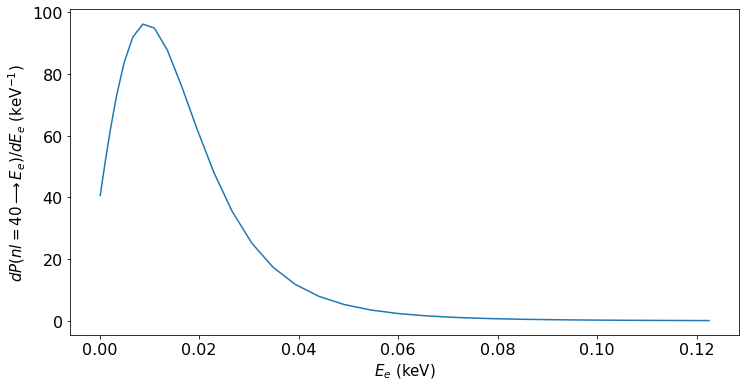

In [ ]:
K= np.linspace(min,max,interval)
E = ((K**2)*27.21138625/2000)
##E = 0.5*(K*27.21138625/1000)**2
##E = (K**2)/2
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(12,6))
plt.plot(E,dP)
plt.xlabel("$E_e$ (keV)", fontsize=15)
plt.ylabel("$dP(nl=40 \longrightarrow E_e)/dE_e$ (keV$^{-1}$)", fontsize=15)
plt.show()

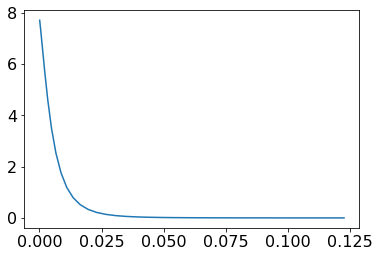

[7.707442691179561, 7.333630393527893, 6.653634350793339, 5.697210199889614, 4.589501923480127, 3.4913265937342737, 2.5283139412745124, 1.7601209591386804, 1.189534027852356, 0.7873428460137513, 0.5142090441931909, 0.33336711916804007, 0.2155584809712856, 0.13951932114336651, 0.0906360363552531, 0.059213214843435245, 0.03895776331193423, 0.025837043993325627, 0.017283654661773937, 0.011666299451496246, 0.00794720179921982, 0.0054638272654362816, 0.003791008682847639, 0.0026541719985867696, 0.0018747287907148627, 0.0013356293414889164, 0.0009595427321197194, 0.0006949604091881904, 0.0005072901743670786, 0.000373109003042936]
0.00013605693125000003 = 7.707442691179561
0.0005442277250000001 = 7.333630393527893
0.00122451238125 = 6.653634350793339
0.0021769109000000005 = 5.697210199889614
0.00340142328125 = 4.589501923480127
0.004898049525 = 3.4913265937342737
0.0066667896312499995 = 2.5283139412745124
0.008707643599999999 = 1.7601209591386804
0.011020611431249999 = 1.189534027852356
0.013

In [ ]:
plt.plot(E,prob1)
plt.show()
print(prob1)
for E, P in zip(E, prob1):
    print("{} = {}".format(E, P))

In [ ]:
K=np.linspace(min,max,interval)
E=(K**2)*27.21138625/2000
f = interpolate.interp1d(E, dP, kind='linear', axis=- 1, copy=True, bounds_error=None, fill_value="extrapolate", assume_sorted=False)
#xnew = np.linspace(0.0001,0.12,12)
#ynew = f(xnew)
#print(ynew)
#plt.plot(E, P, 'o', xnew, ynew, '-')
#plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and callin

(0.003894563708097712, 4.893353368013808e-07)
0.3894563708097712


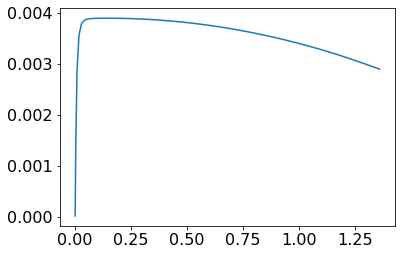

In [ ]:
prob = quad(f,0.0001,0.125)
prob2 = []

for K in np.linspace(min,10,interval):
  E = (K**2)*27.21138625/2000
  prob2.append(quad(f,0.0001,E)[0])
x=np.linspace(min,10,interval)
y=(x**2)*27.21138625/2000
print(prob)
print(prob[0]*100)
plt.plot(y,prob2)
plt.show()